In [1]:
import sys
import os

sys.path.append(os.path.dirname('/home/insane/u/APalysis/analysis'))

import keract
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from nltk.corpus import wordnet as wn
from tensorflow import keras as K
from tqdm import tqdm
from analysis import metrics
import utils

# check if using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

2024-03-24 18:51:10.011583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 18:51:10.011608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 18:51:10.012426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 18:51:10.016539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 18:51:10.747935: W tensorflow/compiler/tf2

Num GPUs Available:  1
Num CPUs Available:  1


2024-03-24 18:51:13.022399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 18:51:13.053857: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 18:51:13.054141: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
model = tf.keras.applications.inception_v3.InceptionV3( weights='imagenet')
model.compile(loss="categorical_crossentropy", optimizer="adam")

ds, info = tfds.load(
    'imagenet2012',
    shuffle_files=False,
    with_info=True,
    as_supervised=True,
    batch_size=None,
    data_dir='/run/media/insane/Games/Tensorflow/tensorflow_datasets'
)
labels = list(map(lambda l: wn.synset_from_pos_and_offset(
        l[0], int(l[1:])).name(), info.features['label'].names))
ds_test = ds['validation']
ds = ds['train']


inception_input_shape = tf.keras.applications.inception_v3.InceptionV3().input.shape[1:3].as_list()
@tf.function
def preprocess(x, y):
    x = tf.image.resize(x, inception_input_shape, method=tf.image.ResizeMethod.BILINEAR)
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    return x, y

def preprocess_inv(x, y):
    x = ((x / 2 + 0.5) * 255).astype(np.uint8).squeeze()
    return x, y

2024-03-24 18:51:13.075928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 18:51:13.076206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 18:51:13.076451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

100%|██████████| 1281167/1281167 [21:40<00:00, 984.78it/s] 


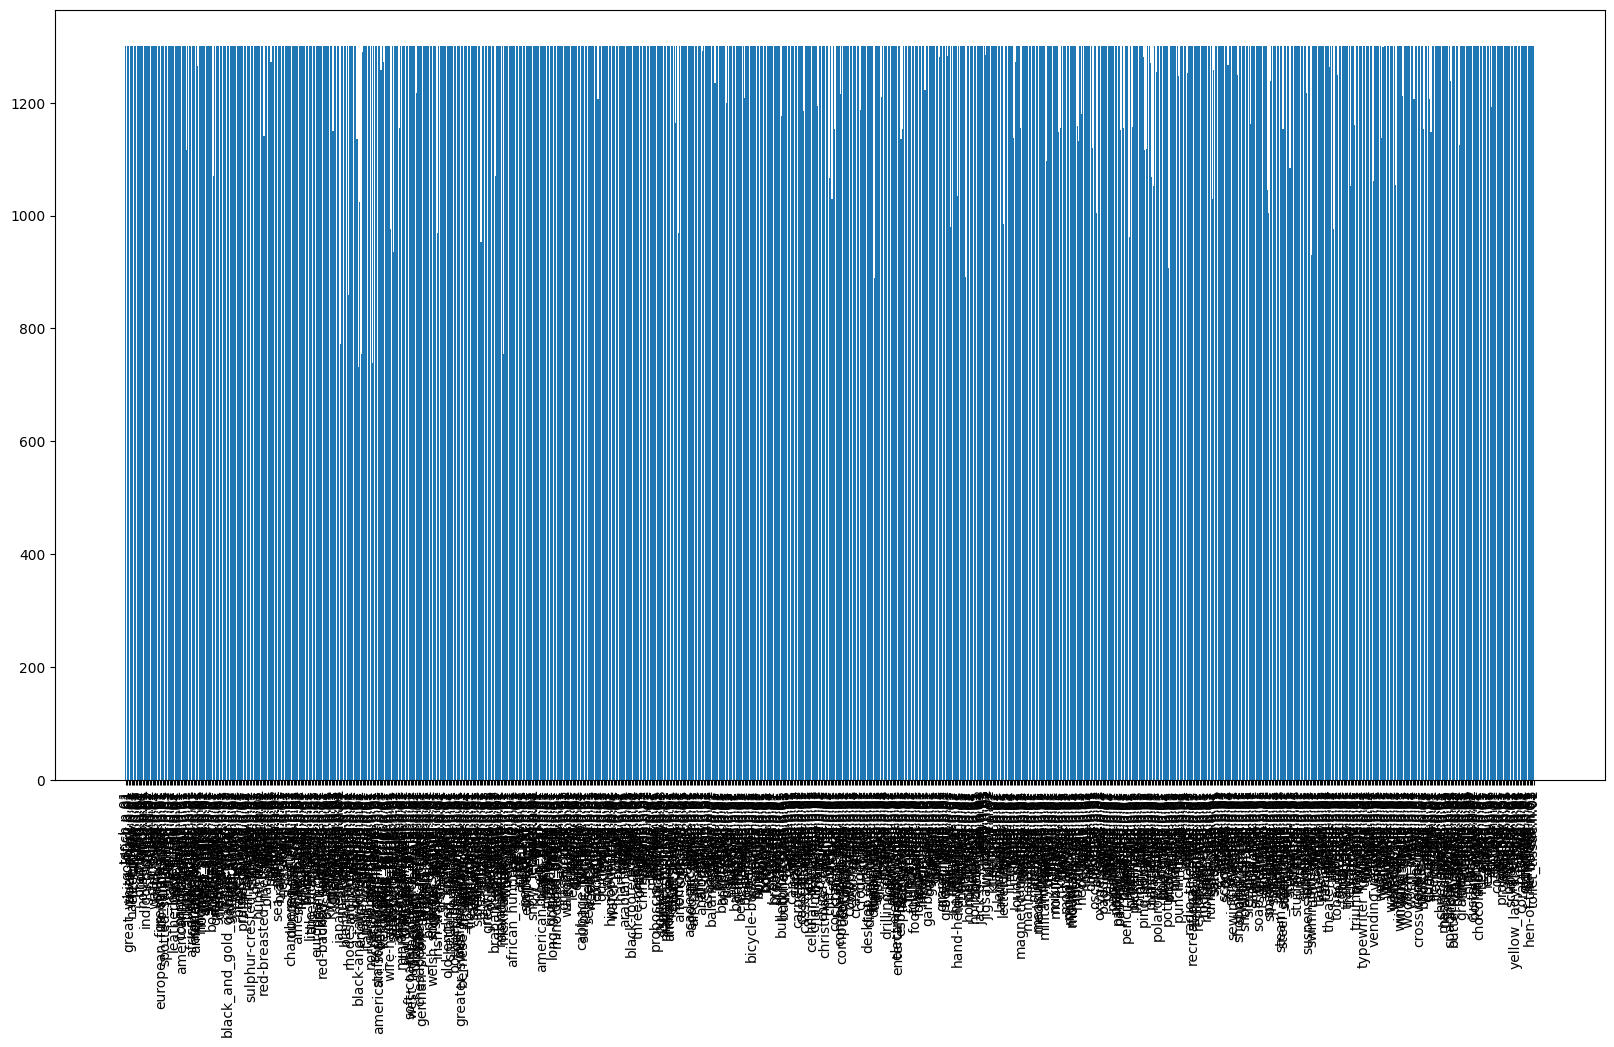

[1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1117. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1266. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1071. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1141. 1300. 1300. 1300. 1300. 1272. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300. 1300.
 1300. 1300. 1300. 1150. 1300. 1300. 1300. 1300.  772. 1300. 1300. 1300.
 1300. 1300.  860. 1300. 1300. 1300. 1300. 1300. 11

In [3]:
# draw barchart on how many images per class is there in imagenet
label_counts = np.zeros(len(labels))
for x, y in tqdm(ds):
    label_counts[y] += 1
total = np.sum(label_counts)
fig = plt.figure(figsize=(20, 10))
plt.bar(labels, label_counts)
plt.xticks(rotation=90)
plt.show()

print(label_counts)

In [11]:
n_samples = [1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1117., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1266., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1071., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1141., 1300., 1300., 1300., 1300., 1272., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1150., 1300., 1300., 1300., 1300., 772., 1300., 1300., 1300.
, 1300., 1300., 860., 1300., 1300., 1300., 1300., 1300., 1136., 732., 1025., 754.
, 1290., 1300., 1300., 1300., 1300., 1300., 1300., 738., 1300., 1300., 1300., 1300.
, 1300., 1258., 1300., 1273., 1300., 1300., 1300., 1300., 977., 1300., 936., 1300.
, 1300., 1300., 1156., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1218., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 969., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 954., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1070., 1300.
, 1300., 1300., 1300., 1300., 755., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1206.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1165., 1300., 969., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1292., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1236., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1199., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1209., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1176., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1186., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1194.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1067., 1300., 1029., 1300., 1154.
, 1300., 1300., 1300., 1216., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1187., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 889., 1300., 1300., 1300., 1300., 1211., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1136., 1153.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1222., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1282., 1300., 1300., 1300., 1300., 1300., 1283., 1300., 980., 1300., 1300.
, 1300., 1300., 1034., 1300., 1300., 1300., 1300., 1300., 891., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1285., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 986.
, 1300., 1300., 1300., 1300., 1300., 1300., 1137., 1272., 1300., 1300., 1300., 1155.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1097., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1149., 1155., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1159., 1133., 1300., 1180., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1120., 1300., 1300., 1005., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1152., 1300.
, 1156., 1300., 1300., 1300., 962., 1300., 1157., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1282., 1117., 1118., 1300., 1300., 1270., 1069., 1053., 1300., 1254.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 908., 1300., 1300., 1300.
, 1300., 1300., 1300., 1247., 1300., 1300., 1300., 1300., 1300., 1253., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1029., 1259., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1267., 1300., 1300., 1300., 1300., 1300., 1300., 1249., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1162., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1045., 1004., 1238., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1153., 1300., 1300., 1300., 1300., 1084., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1217., 1300.
, 1300., 931., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1264., 1300., 1300., 976., 1300., 1300., 1250., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1053., 1300., 1300., 1160., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1062., 1300., 1300.
, 1300., 1300., 1300., 1137., 1299., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1055., 1300., 1300., 1300., 1300., 1213., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1206., 1300., 1300., 1300., 1300., 1300., 1300., 1154., 1300., 1300.
, 1300., 1207., 1149., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1239., 1300., 1300., 1300., 1300., 1300., 1125., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1193., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300., 1300.
, 1300., 1300., 1300., 1300.]

n_samples = np.array(n_samples, dtype=int)
n_samples[[2,3,4]]

array([1300, 1300, 1300])

100%|██████████| 50000/50000 [01:01<00:00, 818.48it/s] 


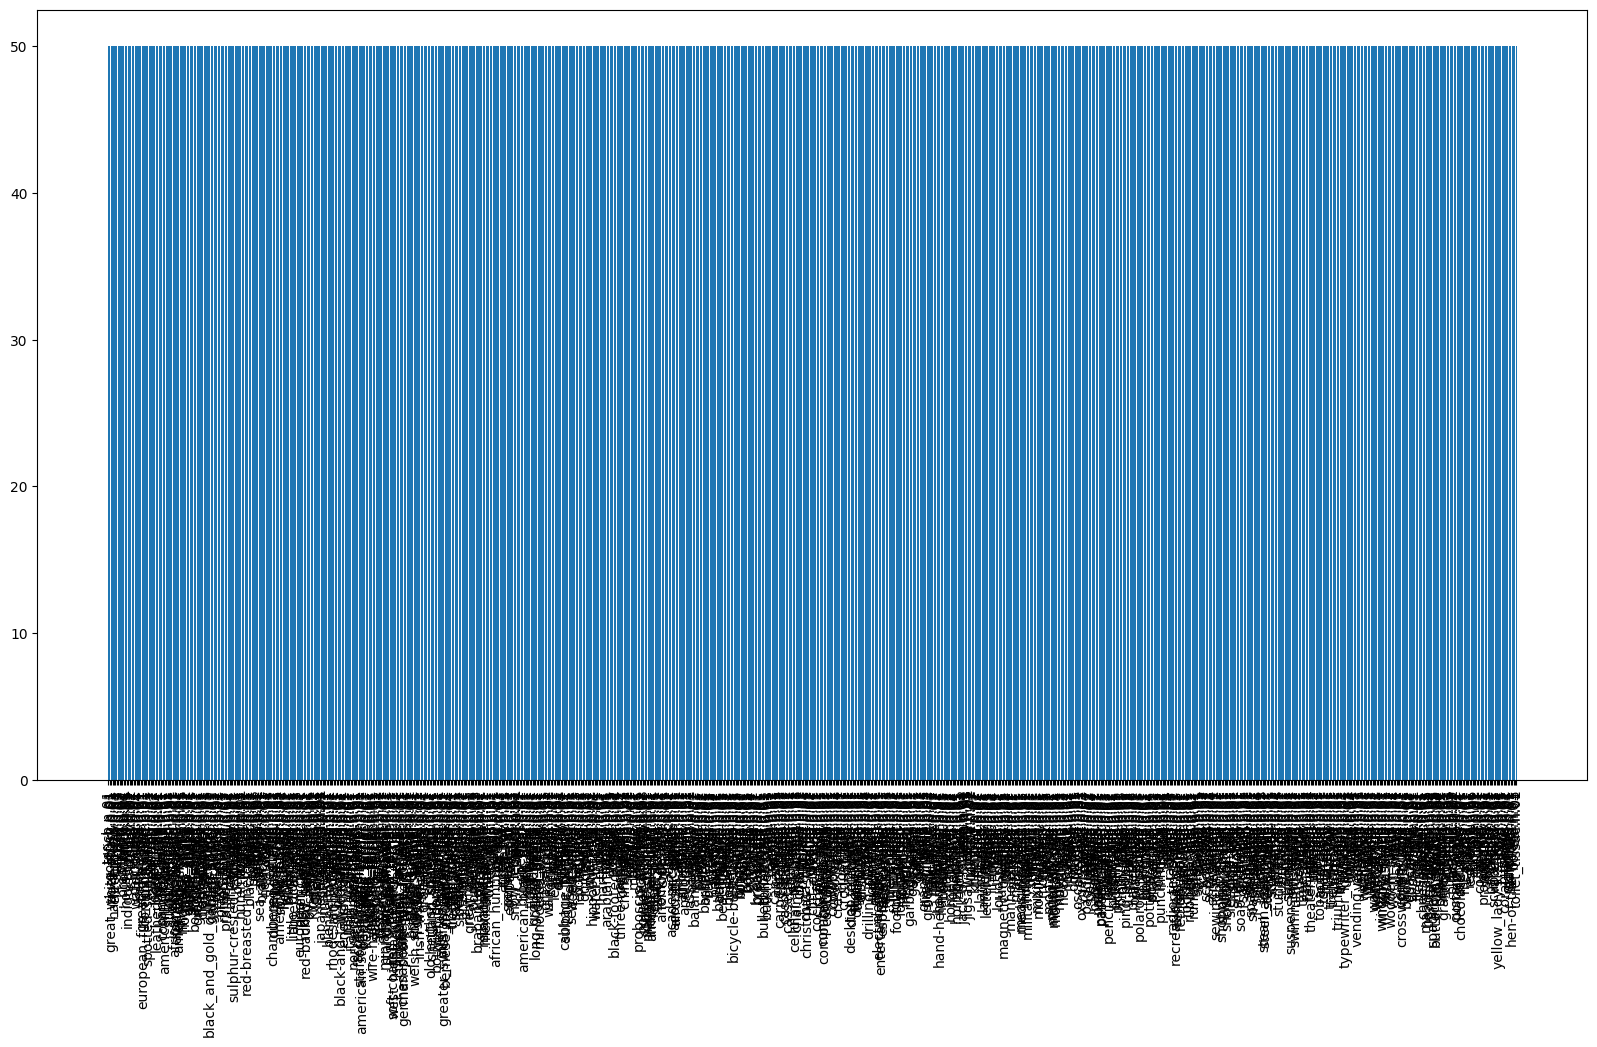

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50

In [6]:
# draw barchart on how many images per class is there in imagenet
label_counts_test = np.zeros(len(labels))
for x, y in tqdm(ds_test):
    label_counts_test[y] += 1
total = np.sum(label_counts_test)
fig = plt.figure(figsize=(20, 10))
plt.bar(labels, label_counts_test)
plt.xticks(rotation=90)
plt.show()

print(label_counts_test)

In [14]:
# get predictions from the model and create confusion matrix
predictions = []
labels = []
for x, y in tqdm(ds_test.map(preprocess).batch(8).as_numpy_iterator()):
    predictions += model.predict(x).argmax(axis=1).tolist()
    labels += y.tolist()
    break
predictions = np.concatenate(predictions)
labels = np.concatenate(labels)
confusion_matrix = metrics.confusion_matrix(labels, predictions)
print(confusion_matrix)

0it [00:00, ?it/s]

2024-03-24 19:00:22.168297: W tensorflow/core/kernels/conv_ops_gpu.cc:322] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 8
in_depths: 32
out_depths: 32
in: 149
in: 149
data_format: 1
filter: 3
filter: 3
filter: 32
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 0
padding: 0
dtype: DT_FLOAT
group_count: 1
device_identifier: "sm_7.5 with 6204293120B RAM, 30 cores, 1680000KHz clock, 7001000KHz mem clock, 3145728B L2$"
version: 3

2024-03-24 19:00:22.169189: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_impl.h:1199 : NOT_FOUND: No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng1{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16778368 bytes.
  Profiling failure on CUDNN engine eng28{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying 

NotFoundError: Graph execution error:

Detected at node inception_v3/conv2d_1/Conv2D defined at (most recent call last):
  File "/home/insane/.pyenv/versions/3.10.13/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/insane/.pyenv/versions/3.10.13/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/insane/.pyenv/versions/3.10.13/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/insane/.pyenv/versions/3.10.13/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/insane/.pyenv/versions/3.10.13/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_1317042/333884054.py", line 5, in <module>

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng1{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16778368 bytes.
  Profiling failure on CUDNN engine eng28{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node inception_v3/conv2d_1/Conv2D}}]] [Op:__inference_predict_function_14411]

In [3]:
def print_dict_numpy(d):
    '''Prints a dictionary with numpy arrays recursively. Numpy arrays are printed as their shape and dtype.'''
    if not isinstance(d, dict):
        print(d)
        return
    for k, v in d.items():
        if isinstance(v, dict):
            print(k, ":", end=" ")
            print_dict_numpy(v)
        elif isinstance(v, np.ndarray):
            print(k, ":", v.shape, v.dtype)
        else:
            print(k, ":", v)

In [4]:
BATCH_SIZE = 1
summary_fn_image = metrics.summary_fn_image_l2
summary_fn_dense = metrics.summary_fn_dense_identity

layers = list(map(lambda layer: layer.name, filter(lambda l: isinstance(l, (
    # K.layers.InputLayer,
    K.layers.Conv2D,
    # K.layers.Dense,
    # K.layers.Flatten,
    K.layers.Concatenate,
)), model.layers)))

labels_so_far = np.zeros(len(labels), dtype=np.int32)
MAX_COUNT = 100
layers_to_save = [
    'mixed10',
    # 'mixed9', 'mixed7'
]
# layers_to_save = layers

for class_label in tqdm(range(330, 1000)):
    # __datasetImgs = [[] for _ in range(len(labels))]
    # __activations = [[] for _ in range(len(labels))]
    __activationsSummary = {k: [] for k in layers_to_save}
    # __datasetLabels = []
    dataset = ds.map(preprocess).batch(BATCH_SIZE).shuffle(1000)
    # printed = False
    for i, (img, label) in enumerate(dataset):
        if label.numpy().item() != class_label:
            continue

        # if not printed:
        #     print("Class :", label.numpy().item())
        #     plt.imshow(img[0])
        #     plt.show()
        #     printed = True

        # Get activations
        activation = keract.get_activations(
            model, img, layer_names=layers_to_save, nodes_to_evaluate=None, output_format='simple', nested=False, auto_compile=True)

        activationSummary = {}
        for layer, v in activation.items():
            if layer not in layers_to_save: continue
            if len(v[0].shape) == 1:
                # dense layer
                activationSummary[layer] = summary_fn_dense(v)
            elif len(v[0].shape) == 3:
                # Image layer
                activationSummary[layer] = summary_fn_image(v)
                
        # labels_so_far[label.numpy()] += 1
        # __datasetLabels += label.numpy().tolist()
        
        for layer, summary in activationSummary.items():
            if layer not in layers_to_save: continue
            __activationsSummary[layer] += summary.tolist()
            
        if layers_to_save[0] in __activationsSummary and len(__activationsSummary[layers_to_save[0]]) >= MAX_COUNT:
            break
            
            
    # datasetImgs = [j for i in __datasetImgs for j in i]
    # activations = [j for i in __activations for j in i]
    activationsSummary = {k: np.array(v) for k, v in __activationsSummary.items()}
    # datasetLabels = np.array(__datasetLabels)
    
    # save the activation summary
    np.savez_compressed(f'./activation_summary/activations_{class_label}.npz', **activationsSummary)
    
# Get the prediction with argmax
# predictions = []
# for i in range(len(activations)):
#     predictions.append(np.argmax(activations[i][layers[-1]][0]).item())

print_dict_numpy(activationsSummary)
# print(datasetLabels.shape)

  0%|          | 0/670 [00:00<?, ?it/s]

2024-03-19 17:06:32.588961: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-19 17:06:32.749210: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:504] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-12.2
  /usr/local/cuda
  /home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda

mixed10 : (100, 2048) float64
mixed9 : (100, 2048) float64
mixed7 : (100, 768) float64
